In [ ]:
#importing libraries
import ast
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset

# loading Data
dataset = load_dataset("lukebarousse/data_jobs")
df = dataset["train"].to_pandas()

#Data Cleanup
df["job_posted_date"] = pd.to_datetime(df["job_posted_date"])
df['job_skills']  = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [13]:
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

df_DA_US = df_DA_US.dropna(subset=['salary_year_avg'])

df_DA_US['salary_year_avg'].sample(10)

763480     80000.0
340549    115000.0
319652    107500.0
627862     70000.0
519417     95592.0
159546    145500.0
270262    115000.0
547461     49546.0
498755    145500.0
118321     98500.0
Name: salary_year_avg, dtype: float64

<Axes: >

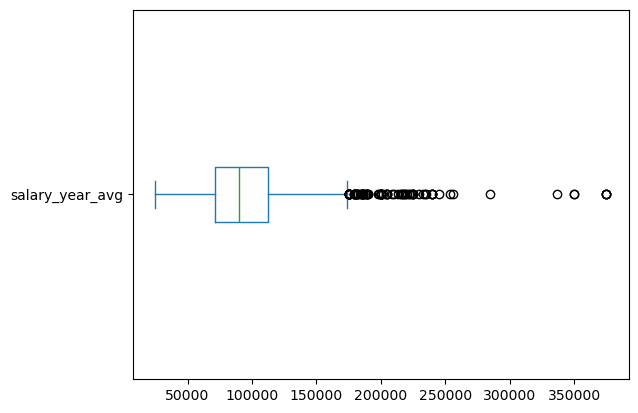

In [17]:
df_DA_US['salary_year_avg'].plot(kind='box', vert=False)

# plt.boxplot(df_DA_US['salary_year_avg'])



/tmp/ipykernel_7506/499965285.py:10: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(job_list, labels=job_titles, vert=False)


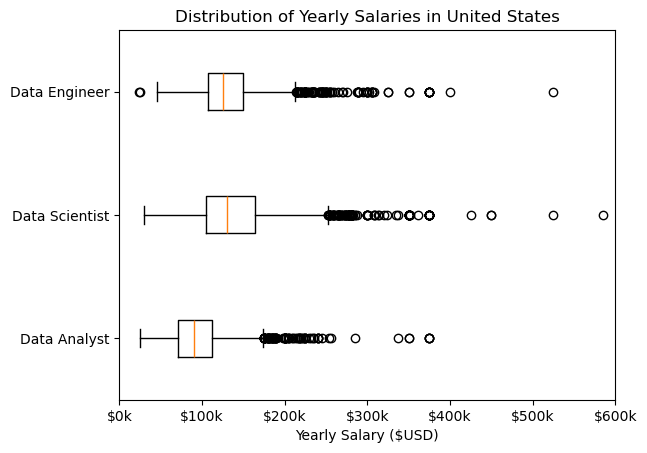

In [32]:
job_titles = ['Data Analyst', 'Data Scientist', 'Data Engineer']

df_US = df[(df['job_title_short'].isin(job_titles)) & (df['job_country'] == 'United States')].copy()

df_US = df_US.dropna(subset=['salary_year_avg'])

job_list = [df_US[df_US['job_title_short']== job_title]['salary_year_avg'] for job_title in job_titles]


plt.boxplot(job_list, labels=job_titles, vert=False)
plt.xlabel('Yearly Salary ($USD)')
plt.title('Distribution of Yearly Salaries in United States')
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda m, pos: f'${int(m/1000)}k'))
plt.xlim(0, 600000)
plt.show()

[109        89000.0
 180        90250.0
 410       133285.0
 988        62623.0
 1413       71300.0
             ...   
 782637     70000.0
 782798    111175.0
 783588    125000.0
 783866    115000.0
 784882     87500.0
 Name: salary_year_avg, Length: 4350, dtype: float64,
 Series([], Name: salary_year_avg, dtype: float64),
 Series([], Name: salary_year_avg, dtype: float64)]

In [28]:
df_US['job_title_short'].value_counts()

job_title_short
Data Scientist    4553
Data Analyst      4350
Data Engineer     2915
Name: count, dtype: int64